<a href="https://colab.research.google.com/github/santhuroyal07/British-Airways_Predictive-modelling-of-customer-bookings/blob/main/Santhosh_British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting customer buying behaviour

In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Customer Booking Data.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df.shape

(50000, 14)

In [ ]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
null_column = df.columns[df.isnull().any()]

In [ ]:
null_column

Index([], dtype='object')

In [ ]:
# @title EDA

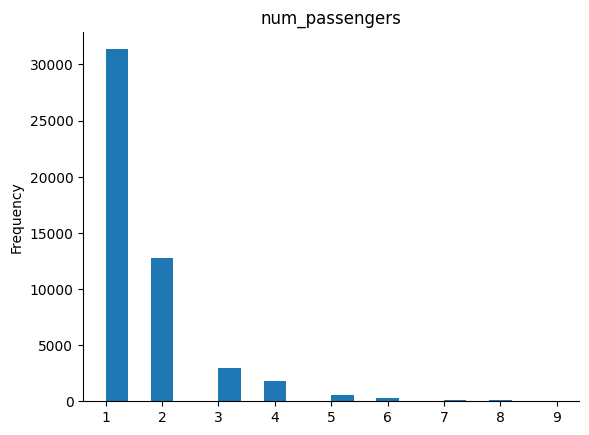

In [ ]:
# @title num_passengers

from matplotlib import pyplot as plt
df['num_passengers'].plot(kind='hist', bins=20, title='num_passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

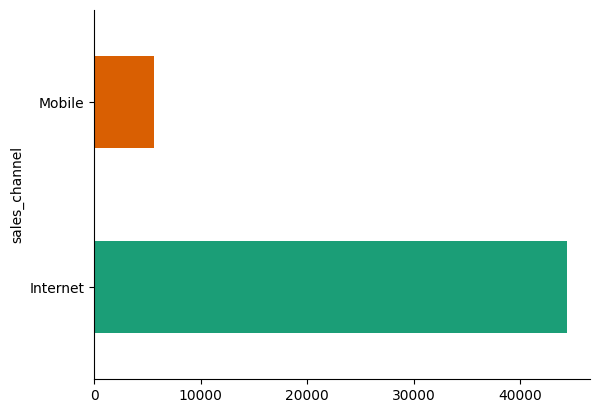

In [ ]:
# @title sales_channel

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sales_channel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='trip_type'>

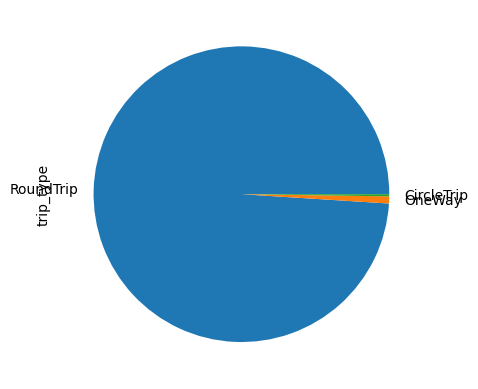

In [ ]:
# @title Distribution of Trip Types

df['trip_type'].value_counts().plot(kind='pie')

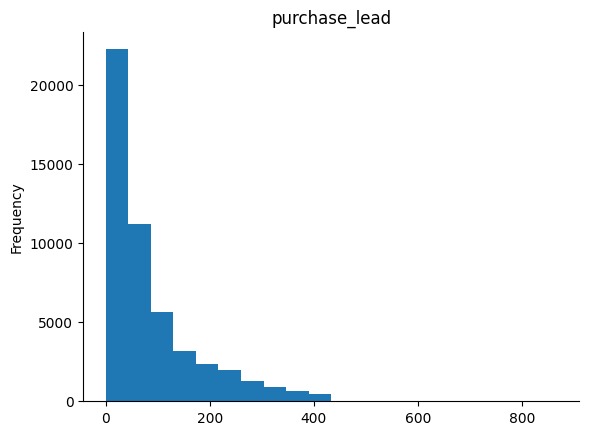

In [ ]:
# @title purchase lead
from matplotlib import pyplot as plt
df['purchase_lead'].plot(kind='hist', bins=20, title='purchase_lead')
plt.gca().spines[['top', 'right',]].set_visible(False)

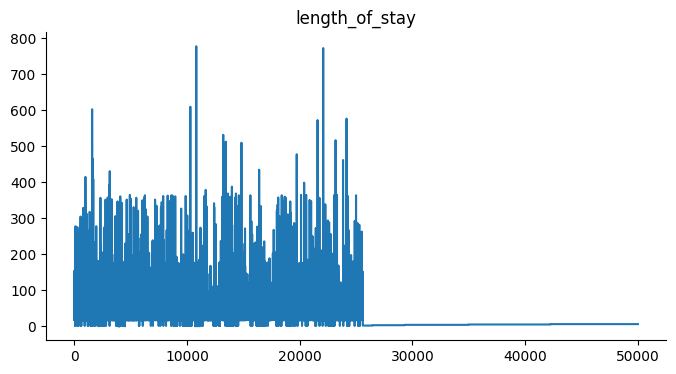

In [ ]:
# @title length_of_stay

from matplotlib import pyplot as plt
df['length_of_stay'].plot(kind='line', figsize=(8, 4), title='length_of_stay')
plt.gca().spines[['top', 'right']].set_visible(False)

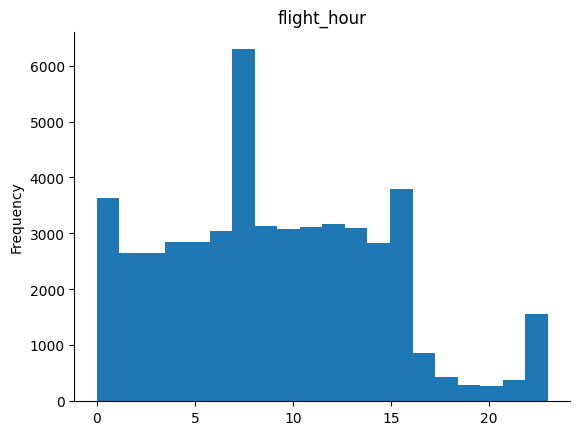

In [ ]:
# @title flight_hour

from matplotlib import pyplot as plt
df['flight_hour'].plot(kind='hist', bins=20, title='flight_hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

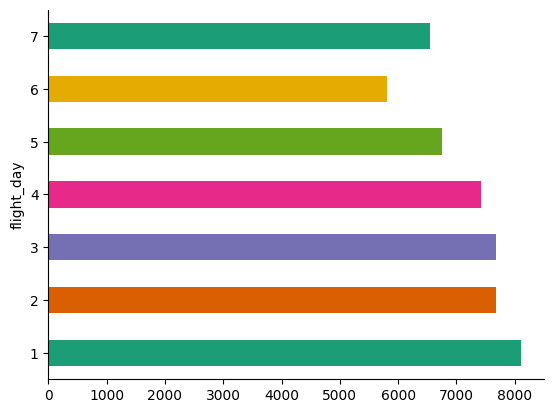

In [ ]:
# @title flight_day

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('flight_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'travelling routes')

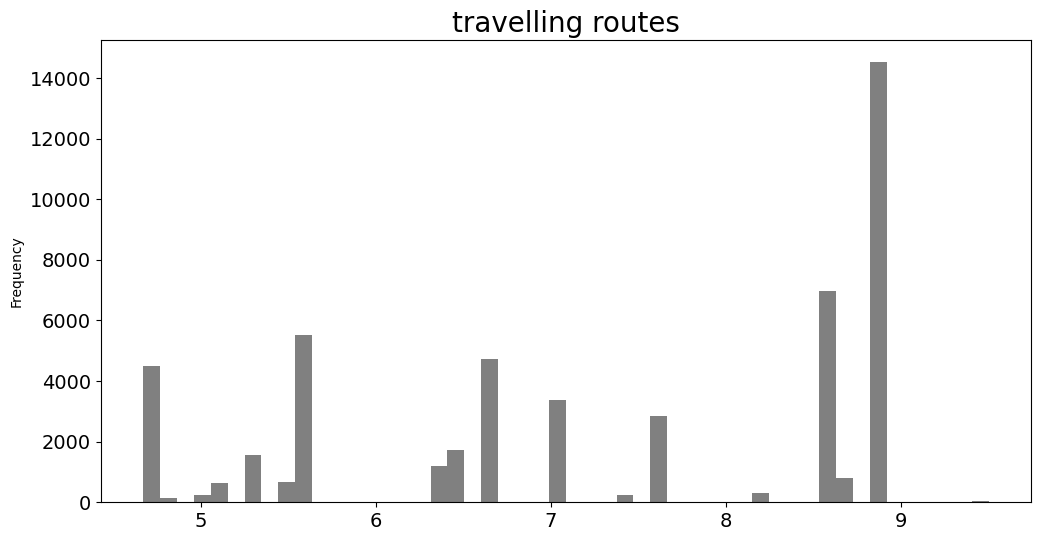

In [ ]:
# @title route
ax = df['flight_duration'].plot.hist(
    figsize=(12, 6),
    fontsize=14,
    bins=50,
    color='gray'
)
ax.set_title('travelling routes', fontsize=20)

In [ ]:
bo = df.booking_origin.value_counts()

In [ ]:
bo

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [ ]:
print(bo[bo>1000])

Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Singapore       1044
Name: booking_origin, dtype: int64


<Axes: ylabel='booking_origin'>

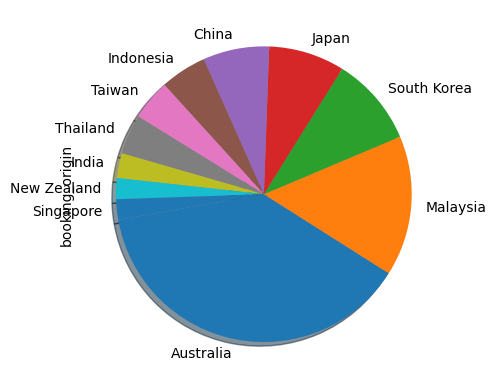

In [ ]:
# @title Booking origin

bo[bo>1000].plot(kind = 'pie',shadow = True, startangle =190)

<Axes: ylabel='wants_extra_baggage'>

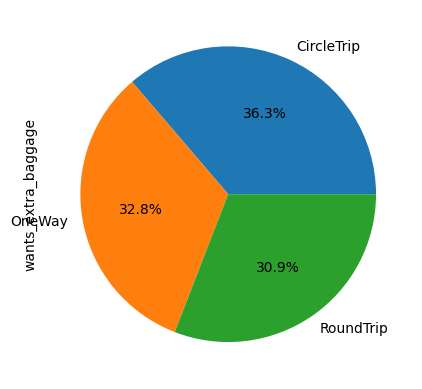

In [ ]:
# @title Percentage of Passengers Wanting Extra Baggage by Trip Type

df.groupby('trip_type')['wants_extra_baggage'].mean().plot(kind='pie', autopct='%1.1f%%')

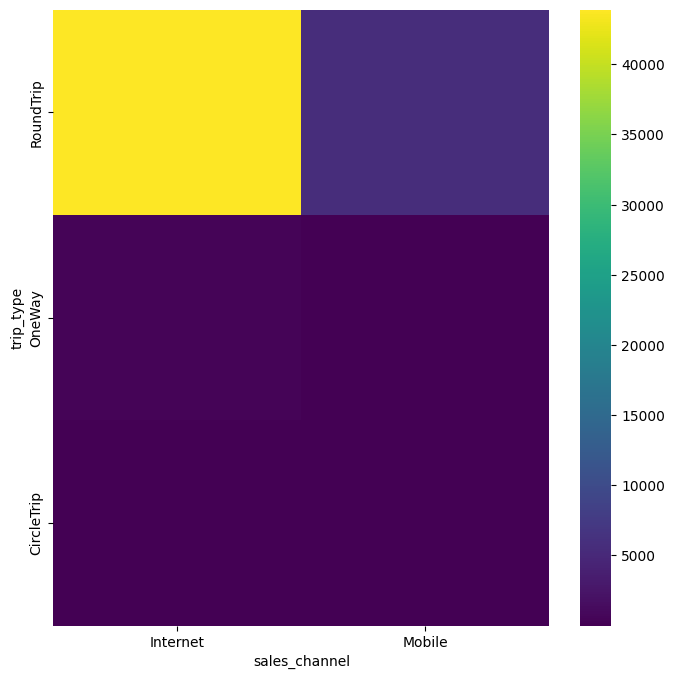

In [ ]:
# @title sales_channel vs trip_type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['trip_type'].value_counts()
    for x_label, grp in df.groupby('sales_channel')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sales_channel')
_ = plt.ylabel('trip_type')

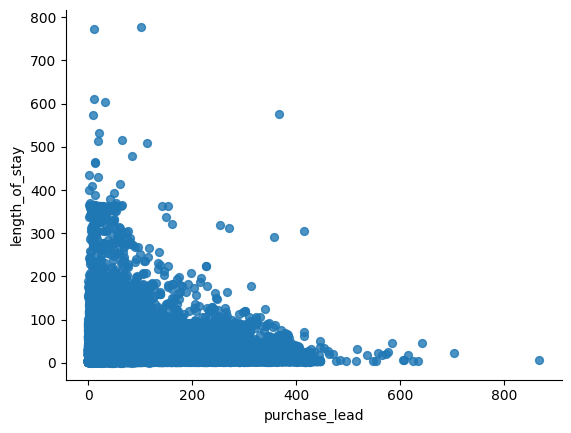

In [ ]:
# @title purchase_lead vs length_of_stay

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='purchase_lead', y='length_of_stay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title model training

In [ ]:
x= pd.DataFrame(df.iloc[:, [0,3,4,5,6,9,10,11,12] ].values)
y= df.iloc[:, -1].values

In [ ]:
x.rename(columns = {0:'num_passengers', 1:'purchase_lead',
                              2:'length_of_stay',3:'flight_hour',4:'flight_day',5:'wants_extra_baggage',6:'wants_preferred_seat',7:'wants_in_flight_meals',8:'flight_duration'}, inplace = True)

In [ ]:
x

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2.0,262.0,19.0,7.0,6.0,1.0,0.0,0.0,5.52
1,1.0,112.0,20.0,3.0,6.0,0.0,0.0,0.0,5.52
2,2.0,243.0,22.0,17.0,3.0,1.0,1.0,0.0,5.52
3,1.0,96.0,31.0,4.0,6.0,0.0,0.0,1.0,5.52
4,2.0,68.0,22.0,15.0,3.0,1.0,0.0,1.0,5.52
...,...,...,...,...,...,...,...,...,...
49995,2.0,27.0,6.0,9.0,6.0,1.0,0.0,1.0,5.62
49996,1.0,111.0,6.0,4.0,7.0,0.0,0.0,0.0,5.62
49997,1.0,24.0,6.0,22.0,6.0,0.0,0.0,1.0,5.62
49998,1.0,15.0,6.0,11.0,1.0,1.0,0.0,1.0,5.62


In [ ]:
x.shape
y.shape

(50000,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)

In [ ]:
print(x_train.dtypes)
print(x_test.dtypes)

num_passengers           float64
purchase_lead            float64
length_of_stay           float64
flight_hour              float64
flight_day               float64
wants_extra_baggage      float64
wants_preferred_seat     float64
wants_in_flight_meals    float64
flight_duration          float64
dtype: object
num_passengers           float64
purchase_lead            float64
length_of_stay           float64
flight_hour              float64
flight_day               float64
wants_extra_baggage      float64
wants_preferred_seat     float64
wants_in_flight_meals    float64
flight_duration          float64
dtype: object


In [ ]:
x_train.drop(columns=["flight_day"], inplace=True)
x_test.drop(columns=["flight_day"], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 20, criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [ ]:
classifier.score(x_train, y_train)

0.98912

In [ ]:
classifier.feature_importances_

array([0.05510281, 0.36528996, 0.18518972, 0.22219939, 0.01410655,
       0.01067981, 0.01647645, 0.13095532])

Text(0.5, 0, 'Feature Importance')

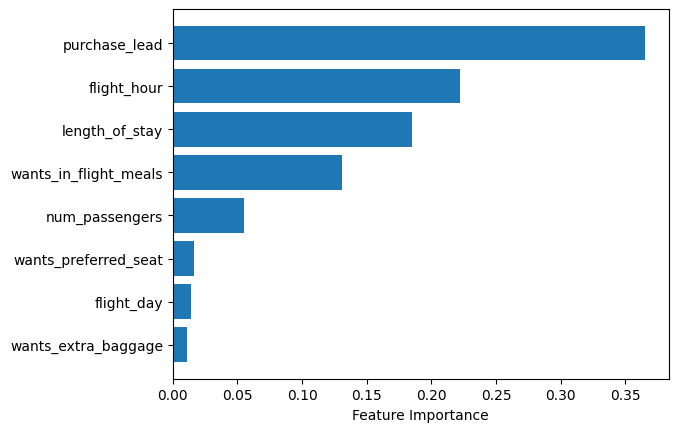

In [ ]:
sort = classifier.feature_importances_.argsort()
plt.barh(x.columns[sort], classifier.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8404


In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Truth')

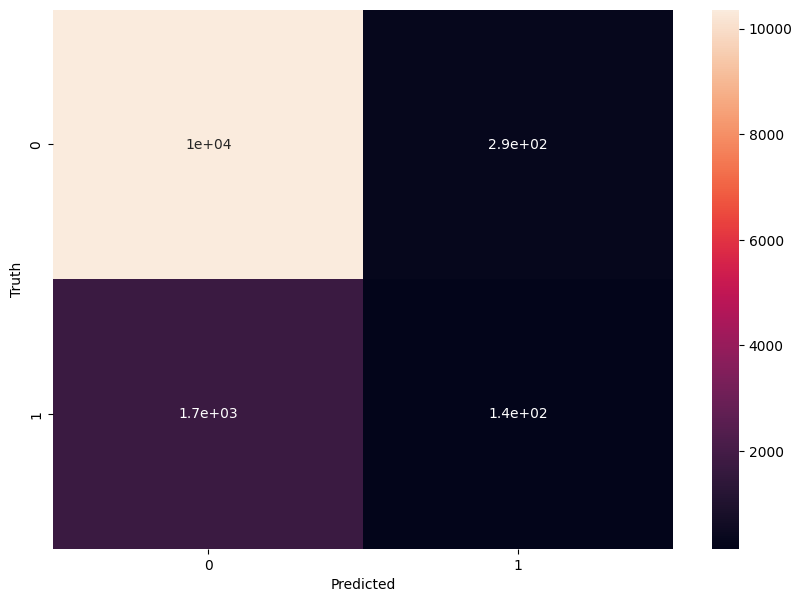

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')